### Karan Vombatkere
CSC 440: Data Mining - Final Project

Below is an implementation of Python code on a dataset with detailed tennis match information from the ATP World Tour.
This notebook implements a logistic regression and neural network machine learning model for classification on the data set.

The number of matches considered is 40.

In [1]:
#Karan Vombatkere
#CSC 440: Data Mining Final Project
#November - Decemeber 2017

#Imports needed
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sbn

import itertools as itools
from statistics import *

import statsmodels.api as sm

#Sklearn imports for Logistic Regression
import sklearn
print(sklearn.__version__)
      
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV

#Imports for sklearn Neural Network
from sklearn.neural_network import MLPClassifier


C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.19.0


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Imports for Neural Network libraries from keras
#from keras.models import Sequential
#from keras.layers import Dense, Activation
#from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
#Import extracted features into dataframe
playerFeatures_0 = pd.read_csv("ATPPlayerFeatures40.csv")

In [4]:
#View the dataset
playerFeatures_0

,PlayerID,PName,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/Match,DF/Match,Future Top 30
0,102776,Andrew Ilie,180.0,40,0.450,0.379310,0.272727,0.519141,0.714681,0.614420,0.346154,6.150,3.525,False
1,103602,Fernando Gonzalez,183.0,40,0.500,0.360000,0.285714,0.585753,0.711104,0.608541,0.421642,6.400,7.350,True
2,102821,Cecil Mamiit,173.0,40,0.350,0.285714,0.083333,0.561590,0.671882,0.588889,0.374582,3.650,2.850,False
3,103387,Paradorn Srichaphan,185.0,40,0.325,0.160000,0.166667,0.547278,0.681467,0.581538,0.383399,5.300,4.525,True
4,102925,Justin Gimelstob,196.0,40,0.425,0.391304,0.272727,0.583462,0.735052,0.585761,0.349481,7.900,4.800,False
5,103181,Jiri Vanek,185.0,40,0.375,0.280000,0.250000,0.547442,0.697113,0.599469,0.392523,6.100,3.150,False
6,102834,Paul Goldstein,178.0,40,0.475,0.360000,0.111111,0.631800,0.644716,0.590769,0.395137,2.325,2.275,False
7,103454,Nicolas Massu,183.0,40,0.525,0.400000,0.125000,0.547837,0.723821,0.581197,0.452915,4.400,2.975,True
8,103188,Michael Russell,173.0,40,0.250,0.137931,0.000000,0.683744,0.625503,0.554622,0.384615,2.475,3.300,False
9,102880,Alexander Popp,201.0,40,0.425,0.357143,0.222222,0.605206,0.679493,0.600559,0.402516,4.350,5.175,False


In [5]:
playerFeatures_0.columns

Index(['PlayerID', 'PName', 'Height(cm)', 'Matches Played', 'Overall Win%',
       'Top 100 Win %', 'Top 30 Win %', 'First Serve %', 'First Serve Win %',
       'BPSave %', 'BPConv %', 'Aces/Match', 'DF/Match', 'Future Top 30'],
      dtype='object')

In [6]:
#Compute Aces/DF Ration (per/match average)
#Rename the Aces Column and drop the DF Column
playerFeatures_0['Aces/Match'] = playerFeatures_0['Aces/Match']/playerFeatures_0['DF/Match']
playerFeatures_0 = playerFeatures_0.rename(columns={'Aces/Match': 'Aces/DF Ratio'})
del playerFeatures_0['DF/Match']

In [7]:
playerFeatures_0.head(20)

,PlayerID,PName,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio,Future Top 30
0,102776,Andrew Ilie,180.0,40,0.450,0.379310,0.272727,0.519141,0.714681,0.614420,0.346154,1.744681,False
1,103602,Fernando Gonzalez,183.0,40,0.500,0.360000,0.285714,0.585753,0.711104,0.608541,0.421642,0.870748,True
2,102821,Cecil Mamiit,173.0,40,0.350,0.285714,0.083333,0.561590,0.671882,0.588889,0.374582,1.280702,False
3,103387,Paradorn Srichaphan,185.0,40,0.325,0.160000,0.166667,0.547278,0.681467,0.581538,0.383399,1.171271,True
4,102925,Justin Gimelstob,196.0,40,0.425,0.391304,0.272727,0.583462,0.735052,0.585761,0.349481,1.645833,False
5,103181,Jiri Vanek,185.0,40,0.375,0.280000,0.250000,0.547442,0.697113,0.599469,0.392523,1.936508,False
6,102834,Paul Goldstein,178.0,40,0.475,0.360000,0.111111,0.631800,0.644716,0.590769,0.395137,1.021978,False
7,103454,Nicolas Massu,183.0,40,0.525,0.400000,0.125000,0.547837,0.723821,0.581197,0.452915,1.478992,True
8,103188,Michael Russell,173.0,40,0.250,0.137931,0.000000,0.683744,0.625503,0.554622,0.384615,0.750000,False
9,102880,Alexander Popp,201.0,40,0.425,0.357143,0.222222,0.605206,0.679493,0.600559,0.402516,0.840580,False


In [8]:
#Code to Normalize the values of the (Height, Aces and DF) columns so they can be used in the Logistic Regression model
#We perform min-max normalization in the [0,1] range
#Function takes the data frame and list of columns to normalize as inputs
#Returns a dataframe with the specified columns normalized

def normalizeFeatures(df, col_list):
    normedDF = df.copy()
    for featureName in col_list:
        maxA = df[featureName].max()
        minA = df[featureName].min()
        normedDF[featureName] = (df[featureName] - minA)/(maxA - minA)
        
    return normedDF

In [9]:
normalizeCols = ['Height(cm)', 'Overall Win%','Top 100 Win %', 'Top 30 Win %', 'First Serve %', 'First Serve Win %','BPSave %', 'BPConv %', 'Aces/DF Ratio']
playerFeatures = normalizeFeatures(playerFeatures_0, normalizeCols)

In [10]:
playerFeatures.head(50)

,PlayerID,PName,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio,Future Top 30
0,102776,Andrew Ilie,0.377778,40,0.434783,0.434384,0.340909,0.186705,0.461934,0.493086,0.436532,0.288329,False
1,103602,Fernando Gonzalez,0.444444,40,0.521739,0.406043,0.357143,0.433982,0.444306,0.467353,0.702428,0.119499,True
2,102821,Cecil Mamiit,0.222222,40,0.260870,0.297020,0.104167,0.344282,0.251036,0.381335,0.536666,0.198696,False
3,103387,Paradorn Srichaphan,0.488889,40,0.217391,0.112518,0.208333,0.291155,0.298268,0.349162,0.567724,0.177555,True
4,102925,Justin Gimelstob,0.733333,40,0.391304,0.451986,0.340909,0.425474,0.562314,0.367643,0.448252,0.269233,False
5,103181,Jiri Vanek,0.488889,40,0.304348,0.288633,0.312500,0.291761,0.375367,0.427647,0.599863,0.325387,False
6,102834,Paul Goldstein,0.333333,40,0.478261,0.406043,0.138889,0.604918,0.117175,0.389566,0.609068,0.148714,False
7,103454,Nicolas Massu,0.444444,40,0.565217,0.464748,0.156250,0.293230,0.506972,0.347666,0.812583,0.237002,True
8,103188,Michael Russell,0.222222,40,0.086957,0.080129,0.000000,0.797743,0.022502,0.231348,0.572008,0.096172,False
9,102880,Alexander Popp,0.844444,40,0.391304,0.401850,0.277778,0.506196,0.288539,0.432414,0.635059,0.113671,False


False    144
True     131
Name: Future Top 30, dtype: int64


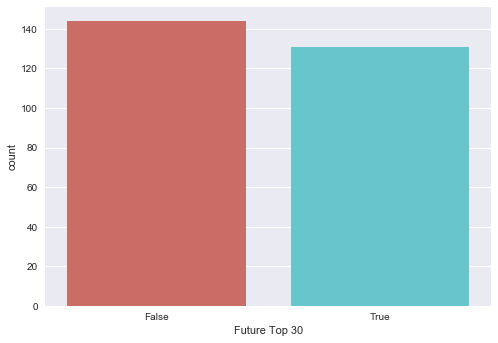

In [11]:
#Some preliminary data exploration

#Get an idea of the counts of True and False values
print(playerFeatures['Future Top 30'].value_counts())

sbn.countplot(x='Future Top 30', data=playerFeatures, palette = 'hls')

In [12]:
#Examine statistics of the attributes
playerFeatures.describe()

,PlayerID,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio
count,275.000000,275.000000,275.0,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,104026.810909,0.494949,40.0,0.428933,0.446223,0.326715,0.454602,0.391092,0.406878,0.600659,0.291058
std,982.986400,0.154419,0.0,0.186361,0.185495,0.196024,0.165453,0.200830,0.168072,0.141580,0.168079
min,102259.000000,0.000000,40.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103199.500000,0.377778,40.0,0.304348,0.317986,0.178571,0.346491,0.236782,0.297914,0.511925,0.170011
50%,103990.000000,0.488889,40.0,0.391304,0.428058,0.312500,0.441466,0.374752,0.407650,0.602114,0.259369
75%,104773.500000,0.600000,40.0,0.521739,0.546707,0.431548,0.554503,0.526734,0.503538,0.688320,0.380261
max,106432.000000,1.000000,40.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
playerFeatures.groupby('Future Top 30').mean()

,PlayerID,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio
Future Top 30,,,,,,,,,,,
False,104103.263889,0.473611,40.0,0.330314,0.350470,0.241358,0.478676,0.322295,0.374159,0.574286,0.268692
True,103942.770992,0.518405,40.0,0.537338,0.551477,0.420542,0.428138,0.466715,0.442843,0.629649,0.315643


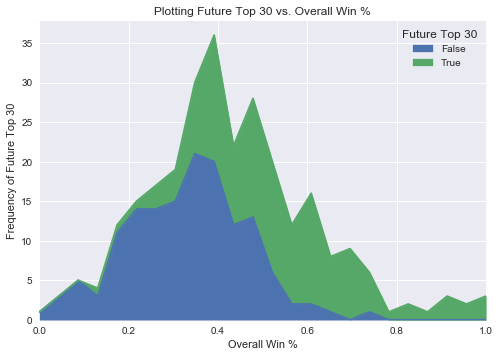

In [14]:
#Examine preliminary relationships to estimate good predictors/features 
#Overall win %
pd.crosstab(playerFeatures['Overall Win%'], playerFeatures['Future Top 30']).plot(kind='area')
plt.title("Plotting Future Top 30 vs. Overall Win %")
plt.xlabel('Overall Win %')
plt.ylabel('Frequency of Future Top 30')

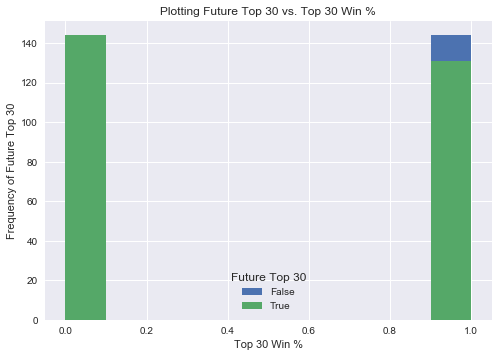

In [217]:
#Examine preliminary relationships to estimate good predictors/features 
#Top 30 win %
pd.crosstab(playerFeatures['First Serve Win %'], playerFeatures['Future Top 30']).plot(kind='hist')
plt.title("Plotting Future Top 30 vs. Top 30 Win %")
plt.xlabel('Top 30 Win %')
plt.ylabel('Frequency of Future Top 30')

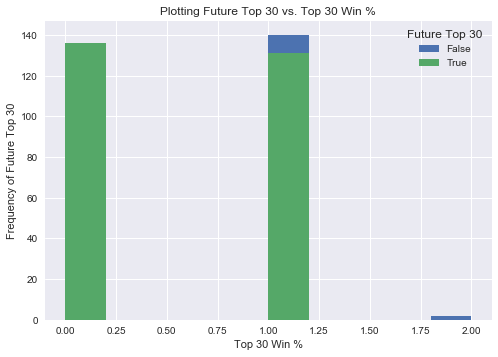

In [213]:
#Examine preliminary relationships to estimate good predictors/features 
#Overall win %
pd.crosstab(playerFeatures['BPSave %'], playerFeatures['Future Top 30']).plot(kind='hist')
plt.title("Plotting Future Top 30 vs. Top 30 Win %")
plt.xlabel('Top 30 Win %')
plt.ylabel('Frequency of Future Top 30')

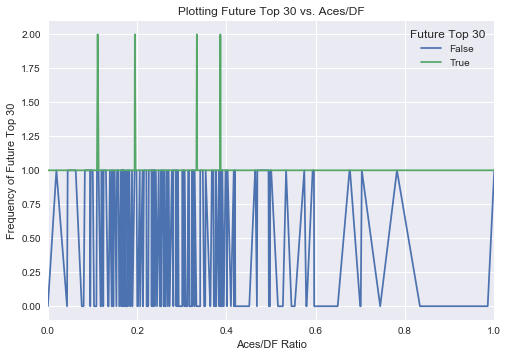

In [208]:
#Examine preliminary relationships to estimate good predictors/features 
#Aces/Match win %
pd.crosstab(playerFeatures['Aces/DF Ratio'], playerFeatures['Future Top 30']).plot(kind='line', stacked = True)
plt.title("Plotting Future Top 30 vs. Aces/DF")
plt.xlabel('Aces/DF Ratio')
plt.ylabel('Frequency of Future Top 30')

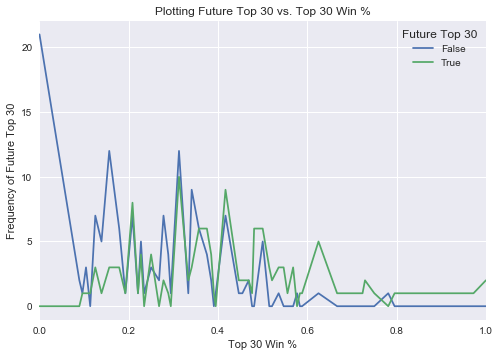

In [16]:
#Examine preliminary relationships to estimate good predictors/features 
#Overall win %
pd.crosstab(playerFeatures['Top 30 Win %'], playerFeatures['Future Top 30']).plot()
plt.title("Plotting Future Top 30 vs. Top 30 Win %")
plt.xlabel('Top 30 Win %')
plt.ylabel('Frequency of Future Top 30')

In [17]:
#Define the training data set and test data
notReqFeatures = ['PlayerID', 'PName', 'Matches Played'] #Columns names not needed in algorithm

#Specify the classification variable
yTarget = 'Future Top 30'

#Specify the features in the input vector
X_init = [i for i in playerFeatures if (i not in yTarget and i not in notReqFeatures)]

In [206]:
X_init

['Height(cm)',
 'Overall Win%',
 'Top 100 Win %',
 'Top 30 Win %',
 'First Serve %',
 'First Serve Win %',
 'BPSave %',
 'BPConv %',
 'Aces/DF Ratio']

In [18]:
playerFeatures[X_init].head()

,Height(cm),Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio
0,0.377778,0.434783,0.434384,0.340909,0.186705,0.461934,0.493086,0.436532,0.288329
1,0.444444,0.521739,0.406043,0.357143,0.433982,0.444306,0.467353,0.702428,0.119499
2,0.222222,0.260870,0.297020,0.104167,0.344282,0.251036,0.381335,0.536666,0.198696
3,0.488889,0.217391,0.112518,0.208333,0.291155,0.298268,0.349162,0.567724,0.177555
4,0.733333,0.391304,0.451986,0.340909,0.425474,0.562314,0.367643,0.448252,0.269233


## Logistic Regression Model
This section creates a logistic regression model and performs Feature Selection, trains the model and then performs k-fold stratified cross validation

In [197]:
#Set up the Logistic Regression Classifier
logregClf = LogisticRegression(C=1, solver='liblinear')
print(logregClf)


#Perform Recursive Feature Elimination to determine the best features to be chosen in the model
#We do this to see if there are any features we should reject on the outset
for i in range(8):
    rfe = RFE(estimator=logregClf, n_features_to_select = i+1)
    rfe = rfe.fit(playerFeatures[X_init], playerFeatures[yTarget])
    print("==================================================================================================")
    print("Performing Recursive Feature Elimination to Select", i+1, "best Features:")
    bestFeatures = []
    for i, val in enumerate(rfe.support_):
        if(val): #Print out the Selected Features
            bestFeatures.append(X_init[i])
    
    print(bestFeatures)
            
    print(rfe.ranking_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Performing Recursive Feature Elimination to Select 1 best Features:
['Overall Win%']
[8 1 2 3 4 5 6 9 7]
Performing Recursive Feature Elimination to Select 2 best Features:
['Overall Win%', 'Top 100 Win %']
[7 1 1 2 3 4 5 8 6]
Performing Recursive Feature Elimination to Select 3 best Features:
['Overall Win%', 'Top 100 Win %', 'Top 30 Win %']
[6 1 1 1 2 3 4 7 5]
Performing Recursive Feature Elimination to Select 4 best Features:
['Overall Win%', 'Top 100 Win %', 'Top 30 Win %', 'First Serve %']
[5 1 1 1 1 2 3 6 4]
Performing Recursive Feature Elimination to Select 5 best Features:
['Overall Win%', 'Top 100 Win %', 'Top 30 Win %', 'First Serve %', 'First Serve Win %']
[4 1 1 1 1 1 2 5 3]
Performing Recursive Feature Elimination 

In [198]:
#Determine final set of features for Logistic Regression Model
#Select final list of features based on the RFE output
X_finalcols = ['Overall Win%', 'Top 100 Win %', 'Top 30 Win %', 'First Serve %', 'First Serve Win %', 'BPSave %', 'Aces/DF Ratio']

X = playerFeatures[X_finalcols]
Y = playerFeatures[yTarget]

In [218]:
X_finalcols

['Overall Win%',
 'Top 100 Win %',
 'Top 30 Win %',
 'First Serve %',
 'First Serve Win %',
 'BPSave %',
 'Aces/DF Ratio']

In [199]:
logit_model=sm.Logit(Y,X)

result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530942
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Future Top 30   No. Observations:                  275
Model:                          Logit   Df Residuals:                      268
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                  0.2328
Time:                        17:58:05   Log-Likelihood:                -146.01
converged:                       True   LL-Null:                       -190.31
                                        LLR p-value:                 5.923e-17
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Overall Win%          4.4653      2.019      2.211      0.027       0.508       8.423
Top 100 

In [200]:
#Perform Grid Searching on the Logistic Regression Model to tune Hyperparameters
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

#Define dictionary of tuning parameters
tune_parameters = [{'C':[10, 1, 0.1, 0.001, 0.0001], 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}]

#Initialize Grid Search
clf = GridSearchCV(LogisticRegression(max_iter=1000), tune_parameters, cv=5, scoring = 'accuracy')
clf.fit(X_train, y_train)

print("Performing Grid Search for Logistic Regression...")
print("Best parameters set found on tuning parameter set:")
print(clf.best_params_)

Performing Grid Search for Logistic Regression...
Best parameters set found on tuning parameter set:
{'C': 1, 'solver': 'liblinear'}


In [268]:
#Run the Logistic regression model with randomly selected test and training data - with cross validation
#Function to perform logistic regression, given the input vector and target values of a data set
#Inputs - xVec is the input feature vector and y is the target class label
#Output - Perform Logistic Regression and return accuracy + Validation results

def LogRegression(xVec, y, testSize):
    start = time.time() #compute the start time

    #Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(xVec, y,test_size = testSize)
    
    #Train the model using the training data set
    logregClf.fit(X_train, y_train)

    #Score on test set generated
    #Predict for the Test Set and return Accuracy
    y_pred = logregClf.predict(X_test)
    
    print("LOGISTIC REGRESSION CLASSIFIER")
    print("Number of Training Samples =", len(X_train))
    print("Number of Test Samples =", len(X_test))
    print("\nTraining model with", ((1-testSize)*100),"% of data and testing with", (testSize*100),"% of the data")
    print("Prediction Accuracy on Test Set =", logregClf.score(X_test,y_test))

    
    #Print Detailed Classification results
    print("\nFull Classification Report:")
    print(classification_report(y_test, y_pred))
    
    #Compute ROC parameters - TPR, FPR
    logit_roc_auc = roc_auc_score(y_test, logregClf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logregClf.predict_proba(X_test)[:,1])
    
    logitROC = plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve for Logistic Regression Model')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    
    #Perform stratified k-fold cross validation
    #Split the data set into 5 folds ~50 players in each fold
    numFolds = 5
    Skfold = model_selection.StratifiedKFold(n_splits = numFolds, shuffle = True, random_state=np.random.randint(100))
    
    modelCV = LogisticRegression()
    scoring = ['accuracy','precision','recall']
    
    #Apply cross validation for each of the evaluation three parameters
    print("\nPerforming Stratified k-fold Cross Validation")
    
    for i, metric in enumerate(scoring):
        print("=============================================================================================")
        results = model_selection.cross_val_score(modelCV, xVec, y, cv=Skfold, scoring=metric)
        print(numFolds,"-fold cross validation average", metric,": %.3f" % (results.mean()))
        print("Best case", metric, ": %.3f" % (results.max()))
        print(results)
    

    #compute runtime
    end = time.time()
    runTime = end - start
    
    print("\nLogistic Regression Classifier Runtime =", runTime, 'seconds')
    
    #for i, val in enumerate(y_pred):
        #if(val[1] > 0.5):
           #print("Player is likely to be a top 30 player with a probability:", val[1])
            
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregClf.score(X_test, y_test)))
    
    return None

LOGISTIC REGRESSION CLASSIFIER
Number of Training Samples = 192
Number of Test Samples = 83

Training model with 70.0 % of data and testing with 30.0 % of the data
Prediction Accuracy on Test Set = 0.710843373494

Full Classification Report:
             precision    recall  f1-score   support

      False       0.82      0.66      0.73        50
       True       0.60      0.79      0.68        33

avg / total       0.74      0.71      0.71        83


Performing Stratified k-fold Cross Validation
5 -fold cross validation average accuracy : 0.750
Best case accuracy : 0.796
[ 0.67857143  0.78181818  0.76363636  0.72727273  0.7962963 ]
5 -fold cross validation average precision : 0.741
Best case precision : 0.792
[ 0.66666667  0.79166667  0.7826087   0.72        0.74193548]
5 -fold cross validation average recall : 0.733
Best case recall : 0.885
[ 0.66666667  0.73076923  0.69230769  0.69230769  0.88461538]

Logistic Regression Classifier Runtime = 0.1470186710357666 seconds


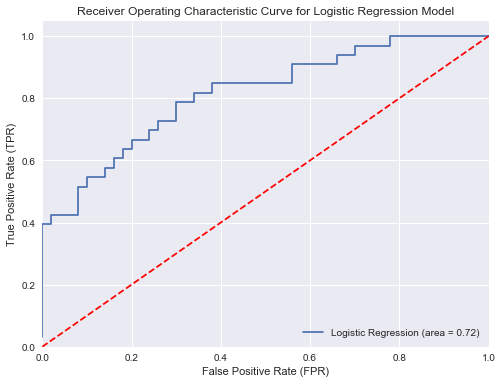

In [298]:
#Run the Logistic Regression Model
LogRegression(X, Y, 0.3)

In [25]:
logregClf.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Neural Network Model
This section creates a Neural Network with one hidden layer and performs Feature Selection, trains the model and then performs k-fold stratified cross validation

In [219]:
#Set up the Neural Network
#We use 16 neurons in the hidden layer and stochastic gradient descent for our solver 
mlpNet = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=5000)
print(mlpNet)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [220]:
#Determine final set of features for Neural Network Model
#Select final list of features based on the RFE output
X_nncols = ['Overall Win%','Top 100 Win %','Top 30 Win %','First Serve Win %','BPSave %', 'BPConv %', 'Aces/DF Ratio']

X_nn = playerFeatures[X_nncols]
Y = playerFeatures[yTarget]

In [225]:
X_nncols

['Overall Win%',
 'Top 100 Win %',
 'Top 30 Win %',
 'First Serve Win %',
 'BPSave %',
 'BPConv %',
 'Aces/DF Ratio']

In [28]:
#Perform Grid Searching on the Neural Network to tune Hyperparameters
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_nn, Y, test_size=0.4)

#Define dictionary of tuning parameters
#tune_parameters = [{'hidden_layer_sizes':[10,30,50], 'learning_rate_init':[0.1,0.01,0.001,0.0001]}]
tune_parameters = [{'activation':['relu','logistic','tanh'], 'learning_rate_init':[0.1,0.01,0.001,0.0001], 
                   'solver':['lbfgs','sgd', 'adam']}]

#Initialize Grid Search
clf = GridSearchCV(MLPClassifier(hidden_layer_sizes=(32, ), max_iter=5000), tune_parameters, cv=5, scoring = 'accuracy')
clf.fit(X_train, y_train)

print("Performing Grid Search for Neural Network...")
print("Best parameters set found on tuning parameter set:")
print(clf.best_params_)

Performing Grid Search ...
Best parameters set found on tuning parameter set:

{'activation': 'relu', 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [277]:
#Define the Neural Network Model using sklearn MLPClassifier

def classificationNetwork(xVec, y, testSize):
    start = time.time() #compute the start time
    
    #Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(xVec, y, test_size = testSize)
    
    #Train the model
    mlpNet.fit(X_train, y_train) 
    
    #Score on test set generated
    #Predict for the Test Set and return Accuracy
    y_pred = mlpNet.predict(X_test)
    
    print("NEURAL NETWORK CLASSIFIER")
    print("Number of Training Samples =", len(X_train))
    print("Number of Test Samples =", len(X_test))
    print("\nTraining model with", ((1-testSize)*100),"% of data and testing with", (testSize*100),"% of the data")
    print("Prediction Accuracy on Test Set =", mlpNet.score(X_test,y_test))

    #Print Detailed Classification results
    print("\nFull Classification Report:")
    print(classification_report(y_test, y_pred))
    
    #Compute ROC parameters - TPR, FPR
    NN_roc_auc = roc_auc_score(y_test, mlpNet.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, mlpNet.predict_proba(X_test)[:,1])
    
    logitROC = plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % NN_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve for Neural Network Model')
    plt.legend(loc="lower right")
    #plt.savefig('NN_ROC')
    
    #Perform stratified k-fold cross validation
    #Split the data set into 5 folds ~50 players in each fold
    numFolds = 5
    Skfold = model_selection.StratifiedKFold(n_splits = numFolds, shuffle = True, random_state=np.random.randint(100))
    
    scoring = ['accuracy','precision','recall']
    
    #Apply cross validation for each of the evaluation three parameters
    print("\nPerforming Stratified k-fold Cross Validation...")
    
    for i, metric in enumerate(scoring):
        print("=============================================================================================")
        results = model_selection.cross_val_score(mlpNet, xVec, y, cv=Skfold, scoring=metric)
        print(numFolds,"-fold cross validation average", metric,": %.3f" % (results.mean()))
        print("Best case", metric, ": %.3f" % (results.max()))
        print(results)
    
    #compute runtime
    end = time.time()
    runTime = end - start
    print("\nNeural Network Classifier Runtime =", runTime, 'seconds')
    print("=============================================================================================")

    return None

NEURAL NETWORK CLASSIFIER
Number of Training Samples = 192
Number of Test Samples = 83

Training model with 70.0 % of data and testing with 30.0 % of the data
Prediction Accuracy on Test Set = 0.722891566265

Full Classification Report:
             precision    recall  f1-score   support

      False       0.70      0.78      0.74        41
       True       0.76      0.67      0.71        42

avg / total       0.73      0.72      0.72        83


Performing Stratified k-fold Cross Validation...
5 -fold cross validation average accuracy : 0.731
Best case accuracy : 0.782
[ 0.73214286  0.70909091  0.72727273  0.78181818  0.7037037 ]
5 -fold cross validation average precision : 0.789
Best case precision : 0.867
[ 0.86666667  0.81481481  0.73076923  0.80952381  0.72413793]
5 -fold cross validation average recall : 0.765
Best case recall : 0.885
[ 0.51851852  0.88461538  0.69230769  0.84615385  0.88461538]

Neural Network Classifier Runtime = 1.9732680320739746 seconds


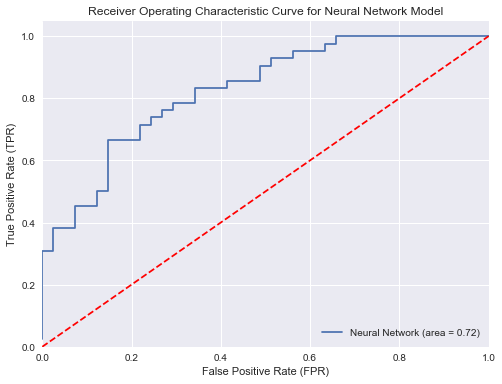

In [305]:
#Run the Neural Network Classifier
classificationNetwork(X_nn, Y, 0.3)

In [31]:
#Define the Neural Network Model in Keras
def create_NN():
    #Compute the dimension of the input feature vector xVec
    #This is just the length of columns list in the dataframe
    inputSize = len(X.columns)
    
    #Construct NN model
    NNmodel = Sequential()
    
    #start from the first hidden layer, since the input is not actually a layer     
    NNmodel.add(Dense(12, input_dim = inputSize, activation='relu'))

    #Output layer
    NNmodel.add(Dense(1, activation='sigmoid'))
    
    #Compile the Neural Network
    NNmodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    #Display model summary
    NNmodel.summary()
    
    return NNmodel
    

In [32]:
#Build the Neural Network Classifier and perform Validation and Evaluation
#Keras Version
def NeuralNet(xVec, y, testSize):
    start = time.time() #compute the start time

    networkModel = KerasClassifier(build_fn=create_NN, epochs=100, verbose=0)
    print(networkModel.get_params())
    
    #Perform stratified k-fold cross validation
    #Split the data set into 5 folds ~50 players in each fold
    numFolds = 5
    Skfold = model_selection.StratifiedKFold(n_splits = numFolds, shuffle = True, random_state=np.random.randint(100))
    
    #Split the data into training and test sets and train the model
    X_train, X_test, y_train, y_test = train_test_split(xVec, y, test_size = testSize, random_state=np.random.randint(100))
    
    #Train the model
    #networkModel.fit()
    
    #Evaluate the results of Validation
    results = model_selection.cross_val_score(networkModel, xVec.values, y.values, cv=Skfold)
    print(numFolds, "-fold cross validation average accuracy: %.3f" % (results.mean()))
    print(results)
    
    #compute runtime
    end = time.time()
    runTime = end - start
    print("Neural Network Classifier Runtime =", runTime, 'seconds')


In [33]:
NeuralNet(X, Y, 0.3)

NameError: name 'KerasClassifier' is not defined